In [164]:
import copy
import datetime

import numpy as np
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [357]:
data = pd.read_csv('../dota2-4k-matches.csv', index_col=0)

In [166]:
data.head()

,match_id,time,radiant_win,radiant_tower1,radiant_tower2,radiant_tower3,radiant_tower4,radiant_melee,radiant_range,radiant_fort,...,d5_artifact_count,d5_null_count,d5_component_cost,d5_secret_shop_cost,d5_consumable_cost,d5_common_cost,d5_rare_cost,d5_epic_cost,d5_artifact_cost,d5_null_cost
0,6022659410,0,0,3,3,3,2,3,3,1,...,0.0,0.0,305.0,0.0,190.0,0.0,0.0,0.0,0.0,0.0
1,6022659410,60,0,3,3,3,2,3,3,1,...,0.0,0.0,305.0,0.0,320.0,0.0,0.0,0.0,0.0,0.0
2,6022659410,120,0,3,3,3,2,3,3,1,...,0.0,0.0,305.0,0.0,320.0,0.0,0.0,0.0,0.0,0.0
3,6022659410,180,0,3,3,3,2,3,3,1,...,0.0,0.0,805.0,0.0,320.0,0.0,0.0,0.0,0.0,0.0
4,6022659410,240,0,3,3,3,2,3,3,1,...,0.0,0.0,805.0,0.0,320.0,0.0,0.0,0.0,0.0,0.0


In [167]:
data.shape

(145528, 279)

In [168]:
# data.columns.to_list()

In [169]:
radiant = ['r' + str(i) for i in range(1, 6)]
dire = ['d' + str(i) for i in range(1, 6)]

In [170]:
player_tags = ['_xp_t', '_gold_t', '_dn_t', '_lh_t', '_artifact_count', '_common_count', '_component_count', '_consumable_count', '_epic_count', '_rare_count', '_secret_shop_count', '_null_count', '_artifact_cost', '_common_cost', '_component_cost', '_consumable_cost', '_epic_cost', '_rare_cost', '_secret_shop_cost', '_null_cost', '_kills_log', '_buyback_log', '_runes_log', '_aegis_count']
common_tags = ['time', 'radiant_roshan_kill',  'dire_roshan_kill', 'radiant_tower1', 'radiant_tower2', 'radiant_tower3', 'radiant_melee', 'radiant_range', 'radiant_fort', 'dire_tower1', 'dire_tower2', 'dire_tower3', 'dire_melee', 'dire_range', 'dire_fort', 'match_id', 'radiant_win']

In [171]:
df = pd.DataFrame()

In [172]:
for tag in common_tags:
    df[tag] = data[tag]

for tag in player_tags:
    df['radiant' + tag] = sum([data[p + tag] for p in radiant])
    df['dire' + tag] = sum([data[p + tag] for p in dire])

In [173]:
df.to_csv('small_data.csv')

In [174]:
small_data = pd.read_csv('small_data.csv', index_col=0)
small_data.head()

,time,radiant_roshan_kill,dire_roshan_kill,radiant_tower1,radiant_tower2,radiant_tower3,radiant_melee,radiant_range,radiant_fort,dire_tower1,...,radiant_null_cost,dire_null_cost,radiant_kills_log,dire_kills_log,radiant_buyback_log,dire_buyback_log,radiant_runes_log,dire_runes_log,radiant_aegis_count,dire_aegis_count
0,0,0,0,3,3,3,3,3,1,3,...,0.0,0.0,0,0,0,0,1,1,0,0
1,60,0,0,3,3,3,3,3,1,3,...,0.0,0.0,1,0,0,0,3,1,0,0
2,120,0,0,3,3,3,3,3,1,3,...,0.0,0.0,1,0,0,0,3,1,0,0
3,180,0,0,3,3,3,3,3,1,3,...,0.0,0.0,2,0,0,0,4,2,0,0
4,240,0,0,3,3,3,3,3,1,3,...,0.0,0.0,3,0,0,0,5,2,0,0


In [175]:
small_data.shape

(145528, 65)

In [176]:
len(small_data.columns)

65

<AxesSubplot:>

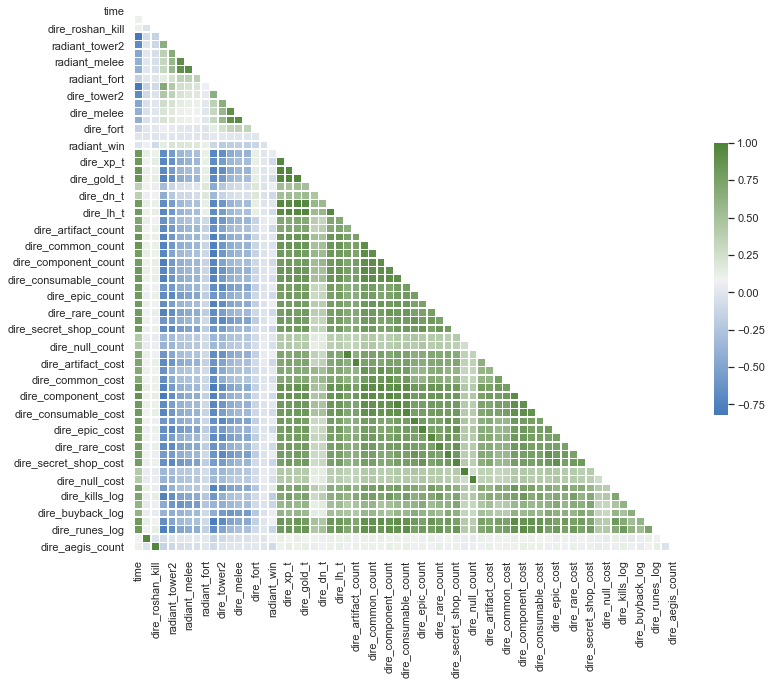

In [177]:
sns.set_theme(style="white")

rs = np.random.RandomState(20)
corr = small_data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(13, 10))

cmap = sns.diverging_palette(250, 120, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<h2>Статистика побед/поражений для персонажей и результаты матчей

In [510]:
data_stats = pd.read_csv('../second_task/dota2-4k-matches-heroes-id.csv')

In [511]:
test_df = copy.deepcopy(data_stats)

In [512]:
test_df = test_df.drop_duplicates(subset=['match_id'])
test_df.head(30)

,Unnamed: 0,match_id,time,radiant_win,radiant_tower1,radiant_tower2,radiant_tower3,radiant_tower4,radiant_melee,radiant_range,...,r1_hero_id,r2_hero_id,r3_hero_id,r4_hero_id,r5_hero_id,d1_hero_id,d2_hero_id,d3_hero_id,d4_hero_id,d5_hero_id
0,0,6022659410,0,0,3,3,3,2,3,3,...,8.0,19.0,121.0,107.0,45.0,41.0,23.0,123.0,58.0,69.0
32,32,6022701284,0,1,3,3,3,2,3,3,...,19.0,46.0,26.0,37.0,53.0,6.0,13.0,9.0,51.0,2.0
56,56,6022711300,0,0,3,3,3,2,3,3,...,16.0,9.0,69.0,111.0,48.0,68.0,41.0,46.0,26.0,60.0
89,89,6022743793,0,0,3,3,3,2,3,3,...,8.0,9.0,65.0,49.0,121.0,119.0,93.0,103.0,98.0,43.0
123,123,6022758673,0,1,3,3,3,2,3,3,...,52.0,120.0,90.0,58.0,70.0,37.0,26.0,98.0,39.0,8.0
154,154,6022762549,0,1,3,3,3,2,3,3,...,121.0,36.0,61.0,88.0,106.0,46.0,19.0,68.0,71.0,29.0
177,177,6022789415,0,1,3,3,3,2,3,3,...,107.0,53.0,121.0,46.0,81.0,68.0,100.0,17.0,97.0,42.0
205,205,6022802265,0,1,3,3,3,2,3,3,...,110.0,26.0,77.0,82.0,106.0,10.0,128.0,121.0,4.0,126.0
231,231,6022884300,0,1,3,3,3,2,3,3,...,123.0,72.0,15.0,104.0,95.0,129.0,76.0,70.0,86.0,83.0
281,281,6023083239,0,1,3,3,3,2,3,3,...,3.0,61.0,13.0,86.0,70.0,88.0,128.0,95.0,19.0,104.0


In [513]:
test_df.shape

(3988, 290)

In [514]:
test_df_ = test_df[:3]
test_df_

,Unnamed: 0,match_id,time,radiant_win,radiant_tower1,radiant_tower2,radiant_tower3,radiant_tower4,radiant_melee,radiant_range,...,r1_hero_id,r2_hero_id,r3_hero_id,r4_hero_id,r5_hero_id,d1_hero_id,d2_hero_id,d3_hero_id,d4_hero_id,d5_hero_id
0,0,6022659410,0,0,3,3,3,2,3,3,...,8.0,19.0,121.0,107.0,45.0,41.0,23.0,123.0,58.0,69.0
32,32,6022701284,0,1,3,3,3,2,3,3,...,19.0,46.0,26.0,37.0,53.0,6.0,13.0,9.0,51.0,2.0
56,56,6022711300,0,0,3,3,3,2,3,3,...,16.0,9.0,69.0,111.0,48.0,68.0,41.0,46.0,26.0,60.0


In [515]:
test_df_ = test_df[['r1_hero_id', 'r2_hero_id', 'r3_hero_id', 'r4_hero_id', 'r5_hero_id', 'd1_hero_id', 'd2_hero_id', 'd3_hero_id', 'd4_hero_id', 'd5_hero_id', 'radiant_win']]

In [516]:
test_df_

,r1_hero_id,r2_hero_id,r3_hero_id,r4_hero_id,r5_hero_id,d1_hero_id,d2_hero_id,d3_hero_id,d4_hero_id,d5_hero_id,radiant_win
0,8.0,19.0,121.0,107.0,45.0,41.0,23.0,123.0,58.0,69.0,0
32,19.0,46.0,26.0,37.0,53.0,6.0,13.0,9.0,51.0,2.0,1
56,16.0,9.0,69.0,111.0,48.0,68.0,41.0,46.0,26.0,60.0,0
89,8.0,9.0,65.0,49.0,121.0,119.0,93.0,103.0,98.0,43.0,0
123,52.0,120.0,90.0,58.0,70.0,37.0,26.0,98.0,39.0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...
145329,93.0,17.0,120.0,107.0,5.0,52.0,32.0,75.0,77.0,20.0,0
145383,60.0,121.0,91.0,93.0,17.0,18.0,120.0,21.0,20.0,58.0,1
145417,20.0,79.0,28.0,46.0,52.0,112.0,35.0,86.0,71.0,108.0,0
145447,9.0,74.0,29.0,3.0,56.0,45.0,25.0,120.0,107.0,114.0,1


In [517]:
heroes_winrate = {}

In [518]:
test_df_['radiant_win'].mean()

0.5157973921765295

In [519]:
heroes_winrate = {}
for match_ in test_df_.iterrows():
    for i in match_[1][:-1]:
        if i in heroes_winrate.keys():
            heroes_winrate[i]['total_games'] += 1
            heroes_winrate[i]['wins'] += match_[1][-1]
        else:
            heroes_winrate[i] = {'wins': 0, 'total_games': match_[1][-1]}

In [520]:
heroes_winrate = dict(sorted(heroes_winrate.items()))
heroes_winrate[1]

{'wins': 75.0, 'total_games': 147.0}

In [521]:
heroes_data = requests.get('https://api.opendota.com/api/heroes')
heroes_data.status_code

200

In [522]:
heroes_data_dict = {}
for hero_data in heroes_data.json():
    heroes_data_dict[hero_data['id']] = hero_data

In [523]:
winrate_heroes = copy.deepcopy(heroes_winrate)
top_winrate = []
less_winrate = []
top = 0
less = 0
for hero_id, data in winrate_heroes.items():
    winrate = data['wins'] / data['total_games']
    if winrate >= 0.5:
        q = winrate_heroes[hero_id]
        winrate_hero = q.update({'winrate': winrate})
        top_winrate.append(winrate_hero)
    if winrate < 0.5:
        winrate_hero = winrate_heroes[hero_id].update({'winrate': winrate})
        less_winrate.append(winrate_hero)

In [524]:
# winrate_heroes

In [525]:
her_winr = {}
for hero_id, hero_data in winrate_heroes.items():
    dict_ = {'hero_id': hero_id, 'wins': hero_data['wins'], 'total_games': hero_data['total_games']}
    her_winr[hero_data['winrate']] = dict_

<h2>Сортировка по винрейту (по возрастанию)

In [194]:
her_winr = dict(sorted(her_winr.items()))

In [195]:
prob_keys = [prob for prob in her_winr.keys()]
top_prob = prob_keys[-7:]
bottom_prob = prob_keys[:7]
top_prob, bottom_prob

([0.58,
  0.580952380952381,
  0.5857142857142857,
  0.5875,
  0.6,
  0.6065573770491803,
  0.8],
 [0.0,
  0.32,
  0.3333333333333333,
  0.3893805309734513,
  0.41015625,
  0.43209876543209874,
  0.4375])

In [196]:
top_prob_heroes = []
less_prob_heroes = []
for i in top_prob:
    top_prob_heroes.append({i: her_winr[i]})
for i in bottom_prob:
    less_prob_heroes.append({i: her_winr[i]})

In [197]:
top_prob_heroes

[{0.58: {'hero_id': 7.0, 'wins': 58.0, 'total_games': 100.0}},
 {0.580952380952381: {'hero_id': 95.0, 'wins': 61.0, 'total_games': 105.0}},
 {0.5857142857142857: {'hero_id': 33.0, 'wins': 41.0, 'total_games': 70.0}},
 {0.5875: {'hero_id': 3.0, 'wins': 94.0, 'total_games': 160.0}},
 {0.6: {'hero_id': 80.0, 'wins': 12.0, 'total_games': 20.0}},
 {0.6065573770491803: {'hero_id': 84.0, 'wins': 74.0, 'total_games': 122.0}},
 {0.8: {'hero_id': 82.0, 'wins': 8.0, 'total_games': 10.0}}]

In [198]:
less_prob_heroes

[{0.0: {'hero_id': 135.0, 'wins': 0, 'total_games': 1.0}},
 {0.32: {'hero_id': 73.0, 'wins': 16.0, 'total_games': 50.0}},
 {0.3333333333333333: {'hero_id': 59.0, 'wins': 8.0, 'total_games': 24.0}},
 {0.3893805309734513: {'hero_id': 71.0, 'wins': 44.0, 'total_games': 113.0}},
 {0.41015625: {'hero_id': 78.0, 'wins': 105.0, 'total_games': 256.0}},
 {0.43209876543209874: {'hero_id': 64.0, 'wins': 35.0, 'total_games': 81.0}},
 {0.4375: {'hero_id': 66.0, 'wins': 28.0, 'total_games': 64.0}}]

In [199]:
top_prob_heroes[1:]

[{0.580952380952381: {'hero_id': 95.0, 'wins': 61.0, 'total_games': 105.0}},
 {0.5857142857142857: {'hero_id': 33.0, 'wins': 41.0, 'total_games': 70.0}},
 {0.5875: {'hero_id': 3.0, 'wins': 94.0, 'total_games': 160.0}},
 {0.6: {'hero_id': 80.0, 'wins': 12.0, 'total_games': 20.0}},
 {0.6065573770491803: {'hero_id': 84.0, 'wins': 74.0, 'total_games': 122.0}},
 {0.8: {'hero_id': 82.0, 'wins': 8.0, 'total_games': 10.0}}]

In [200]:
tset_top_prob_heroes = top_prob_heroes[2:]
tset_top_prob_heroes

[{0.5857142857142857: {'hero_id': 33.0, 'wins': 41.0, 'total_games': 70.0}},
 {0.5875: {'hero_id': 3.0, 'wins': 94.0, 'total_games': 160.0}},
 {0.6: {'hero_id': 80.0, 'wins': 12.0, 'total_games': 20.0}},
 {0.6065573770491803: {'hero_id': 84.0, 'wins': 74.0, 'total_games': 122.0}},
 {0.8: {'hero_id': 82.0, 'wins': 8.0, 'total_games': 10.0}}]

In [201]:
def convert_hero_id_to_name(hero_id):
    return heroes_data_dict[hero_id]['name']

In [562]:
convert_hero_id_to_name(33)

'npc_dota_hero_enigma'

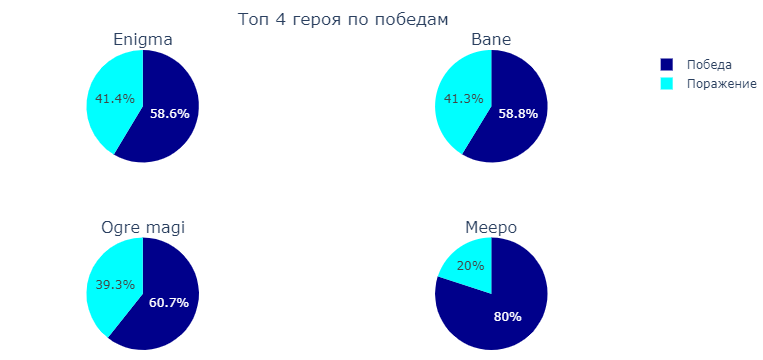

In [250]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = ['Победа', 'Поражение']

# Define color sets of paintings
irises_colors = ['darkblue', 'cyan']

subplot_titles = ['Enigma', 'Bane', 'Ogre magi', 'Meepo']
# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, subplot_titles=subplot_titles, specs=specs)

# Define pie charts
fig.add_trace(go.Pie(labels=labels, values=[41.0, 70-41], name="Enigma's winrate",
                     marker_colors=irises_colors), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=[94, 160-94], name="Banes's winrate",
                     marker_colors=irises_colors), 1, 2)
fig.add_trace(go.Pie(labels=labels, values=[74, 122-74], name="Ogre magi's winrate",
                     marker_colors=irises_colors), 2, 1)
fig.add_trace(go.Pie(labels=labels, values=[8, 10-8], name="Mepoo's winrate",
                     marker_colors=irises_colors
                    ), 2, 2)

# Tune layout and hover info
# fig.update_traces(hoverinfo='label+percent+value', textinfo='none')
fig.update_layout(margin=dict(t=50, b=10, l=0, r=10), title_text='Топ 4 героя по победам', title_x=0.45)
fig = go.Figure(fig)
fig.show()

In [204]:
less_prob_heroes

[{0.0: {'hero_id': 135.0, 'wins': 0, 'total_games': 1.0}},
 {0.32: {'hero_id': 73.0, 'wins': 16.0, 'total_games': 50.0}},
 {0.3333333333333333: {'hero_id': 59.0, 'wins': 8.0, 'total_games': 24.0}},
 {0.3893805309734513: {'hero_id': 71.0, 'wins': 44.0, 'total_games': 113.0}},
 {0.41015625: {'hero_id': 78.0, 'wins': 105.0, 'total_games': 256.0}},
 {0.43209876543209874: {'hero_id': 64.0, 'wins': 35.0, 'total_games': 81.0}},
 {0.4375: {'hero_id': 66.0, 'wins': 28.0, 'total_games': 64.0}}]

In [563]:
convert_hero_id_to_name(73)

'npc_dota_hero_alchemist'

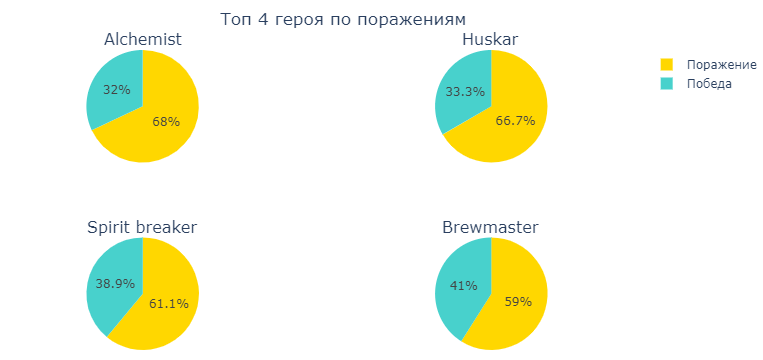

In [266]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = ['Победа', 'Поражение']

# Define color sets of paintings
sunflowers_colors = ['mediumturquoise', 'gold']

subplot_titles = ['Alchemist', 'Huskar', 'Spirit breaker', 'Brewmaster']
# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, subplot_titles=subplot_titles, specs=specs)

# Define pie charts
fig.add_trace(go.Pie(labels=labels, values=[16, 50-16], name="Alchemist's winrate",
                     marker_colors=sunflowers_colors), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=[8, 24-8], name="Huskar's winrate",
                     marker_colors=sunflowers_colors), 1, 2)
fig.add_trace(go.Pie(labels=labels, values=[44, 113-44],
                     marker_colors=sunflowers_colors), 2, 1)
fig.add_trace(go.Pie(labels=labels, values=[105, 256-105],
                     marker_colors=sunflowers_colors), 2, 2)

# Tune layout and hover info
# fig.update_traces(hoverinfo='label+percent+value', textinfo='none')
fig.update_layout(margin=dict(t=50, b=10, l=0, r=10), title_text='Топ 4 героя по поражениям', title_x=0.45)
fig = go.Figure(fig)
fig.show()

<h2>Рассмотрим матч OG-Liquid

In [207]:
import pandas as pd

In [493]:
data = pd.read_csv('../second_task/dota2-4k-matches-heroes-id.csv', index_col=0)

In [585]:
# match_id = 6046389369
match_id = 6111964016 # - as monaco gambit
# match_id = 6023949092

In [586]:
certain_match_data = data[data['match_id'] == match_id]
certain_match_data.head()

,match_id,time,radiant_win,radiant_tower1,radiant_tower2,radiant_tower3,radiant_tower4,radiant_melee,radiant_range,radiant_fort,...,r1_hero_id,r2_hero_id,r3_hero_id,r4_hero_id,r5_hero_id,d1_hero_id,d2_hero_id,d3_hero_id,d4_hero_id,d5_hero_id
78501,6111964016,0,0,3,3,3,2,3,3,1,...,42.0,55.0,16.0,9.0,110.0,65.0,23.0,78.0,123.0,46.0
78502,6111964016,60,0,3,3,3,2,3,3,1,...,42.0,55.0,16.0,9.0,110.0,65.0,23.0,78.0,123.0,46.0
78503,6111964016,120,0,3,3,3,2,3,3,1,...,42.0,55.0,16.0,9.0,110.0,65.0,23.0,78.0,123.0,46.0
78504,6111964016,180,0,3,3,3,2,3,3,1,...,42.0,55.0,16.0,9.0,110.0,65.0,23.0,78.0,123.0,46.0
78505,6111964016,240,0,3,3,3,2,3,3,1,...,42.0,55.0,16.0,9.0,110.0,65.0,23.0,78.0,123.0,46.0


In [587]:
certain_match_data.tail()

,match_id,time,radiant_win,radiant_tower1,radiant_tower2,radiant_tower3,radiant_tower4,radiant_melee,radiant_range,radiant_fort,...,r1_hero_id,r2_hero_id,r3_hero_id,r4_hero_id,r5_hero_id,d1_hero_id,d2_hero_id,d3_hero_id,d4_hero_id,d5_hero_id
78531,6111964016,1800,0,0,1,3,2,3,3,1,...,42.0,55.0,16.0,9.0,110.0,65.0,23.0,78.0,123.0,46.0
78532,6111964016,1860,0,0,0,3,2,3,3,1,...,42.0,55.0,16.0,9.0,110.0,65.0,23.0,78.0,123.0,46.0
78533,6111964016,1920,0,0,0,2,2,2,2,1,...,42.0,55.0,16.0,9.0,110.0,65.0,23.0,78.0,123.0,46.0
78534,6111964016,1980,0,0,0,1,2,1,1,1,...,42.0,55.0,16.0,9.0,110.0,65.0,23.0,78.0,123.0,46.0
78535,6111964016,2040,0,0,0,1,2,1,1,0,...,42.0,55.0,16.0,9.0,110.0,65.0,23.0,78.0,123.0,46.0


In [588]:
radiant_gold = ['r' + str(i) + '_gold_t' for i in range(1, 6)]
dire_gold = ['d' + str(i) + '_gold_t' for i in range(1, 6)]

In [589]:
radiant_gold + dire_gold

['r1_gold_t',
 'r2_gold_t',
 'r3_gold_t',
 'r4_gold_t',
 'r5_gold_t',
 'd1_gold_t',
 'd2_gold_t',
 'd3_gold_t',
 'd4_gold_t',
 'd5_gold_t']

In [590]:
data_gold = certain_match_data[['time'] + radiant_gold + dire_gold]
data_gold.head()

,time,r1_gold_t,r2_gold_t,r3_gold_t,r4_gold_t,r5_gold_t,d1_gold_t,d2_gold_t,d3_gold_t,d4_gold_t,d5_gold_t
78501,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78502,60,190.0,151.0,482.0,701.0,253.0,188.0,265.0,366.0,188.0,232.0
78503,120,290.0,251.0,847.0,908.0,516.0,328.0,629.0,578.0,380.0,595.0
78504,180,390.0,351.0,1074.0,1209.0,731.0,428.0,955.0,936.0,480.0,899.0
78505,240,490.0,617.0,1405.0,1529.0,1108.0,668.0,1522.0,1338.0,796.0,1224.0


In [591]:
time = []
radiant_gold_t = []
dire_gold_t = []
for row in data_gold.iterrows():
    # row[1] - data
    time.append(row[1][0])
    radiant = row[1][1:6].values
    dire = row[1][6:11].values
    
    radiant_gold_t.append(sum(radiant))
    dire_gold_t.append(sum(dire))

In [592]:
dict_ = {'time': time, 'radiant_gold': radiant_gold_t, 'dire_gold': dire_gold_t}

In [593]:
df_team = pd.DataFrame(dict_)
df_team.head()

,time,radiant_gold,dire_gold
0,0.0,0.0,0.0
1,60.0,1777.0,1239.0
2,120.0,2812.0,2510.0
3,180.0,3755.0,3698.0
4,240.0,5149.0,5548.0


<h3>Преимущество Team Radiant (Team Liquid) по золоту

In [594]:
zip_obj = zip(radiant_gold_t, dire_gold_t)
gold_radiant = []
for list1_i, list2_i in zip_obj:
    gold_radiant.append(list1_i - list2_i)

In [595]:
gold_radiant[:3]

[0.0, 538.0, 302.0]

In [596]:
gold_radiant_df = pd.DataFrame({'time': time[:-1], 'gold_radiant': gold_radiant[:-1]})
gold_radiant_df.head()

,time,gold_radiant
0,0.0,0.0
1,60.0,538.0
2,120.0,302.0
3,180.0,57.0
4,240.0,-399.0


<h2>Преимущество Team Radiant (Team Liquid) по золоту

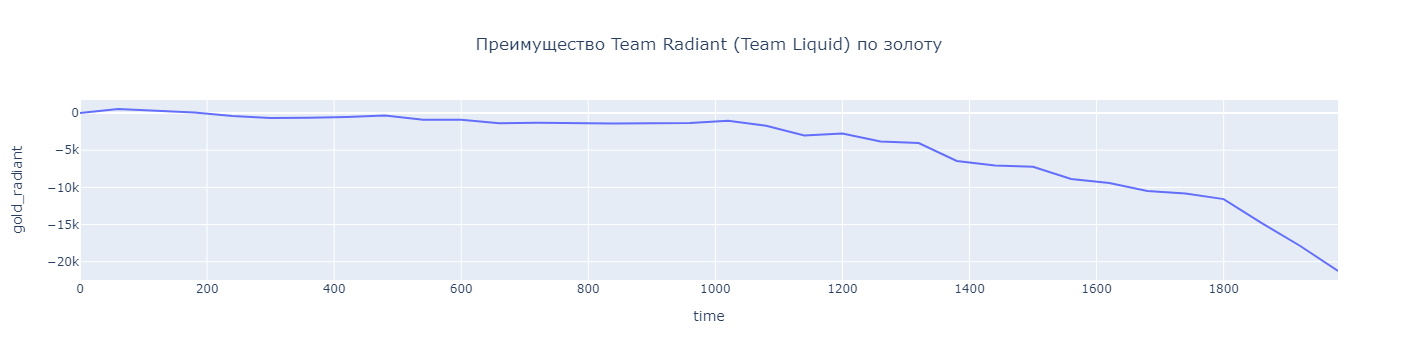

In [597]:
# Using plotly.express
import plotly.express as px

df = gold_radiant_df
fig = px.line(df, x='time', y="gold_radiant", title='Преимущество Team Radiant (Team Liquid) по золоту')
fig.update_layout(title_x=0.5)
fig.show()

<h2>Преимущество Team Radiant (Team Liquid) по опыту

In [598]:
radiant_xp = ['r' + str(i) + '_xp_t' for i in range(1, 6)]
dire_xp = ['d' + str(i) + '_xp_t' for i in range(1, 6)]

In [599]:
data_xp = certain_match_data[['time'] + radiant_xp + dire_xp]
data_xp.head()

,time,r1_xp_t,r2_xp_t,r3_xp_t,r4_xp_t,r5_xp_t,d1_xp_t,d2_xp_t,d3_xp_t,d4_xp_t,d5_xp_t
78501,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78502,60,53.0,87.0,340.0,248.0,297.0,68.0,91.0,187.0,62.0,240.0
78503,120,274.0,194.0,561.0,503.0,744.0,341.0,295.0,452.0,182.0,779.0
78504,180,483.0,313.0,770.0,805.0,1142.0,519.0,530.0,722.0,338.0,1177.0
78505,240,638.0,432.0,1128.0,1255.0,1685.0,671.0,1204.0,1151.0,509.0,1564.0


In [600]:
time = []
radiant_xp_t = []
dire_xp_t = []
for row in data_xp.iterrows():
    # row[1] - data
    time.append(row[1][0])
    radiant = row[1][1:6].values
    dire = row[1][6:11].values
    
    radiant_xp_t.append(sum(radiant))
    dire_xp_t.append(sum(dire))

In [601]:
zip_obj = zip(radiant_xp_t, dire_xp_t)
xp_radiant = []
for list1_i, list2_i in zip_obj:
    xp_radiant.append(list1_i - list2_i)

In [602]:
xp_radiant_df = pd.DataFrame({'time': time[:-1], 'xp_radiant': xp_radiant[:-1]})
xp_radiant_df.head()

,time,xp_radiant
0,0.0,0.0
1,60.0,377.0
2,120.0,227.0
3,180.0,227.0
4,240.0,39.0


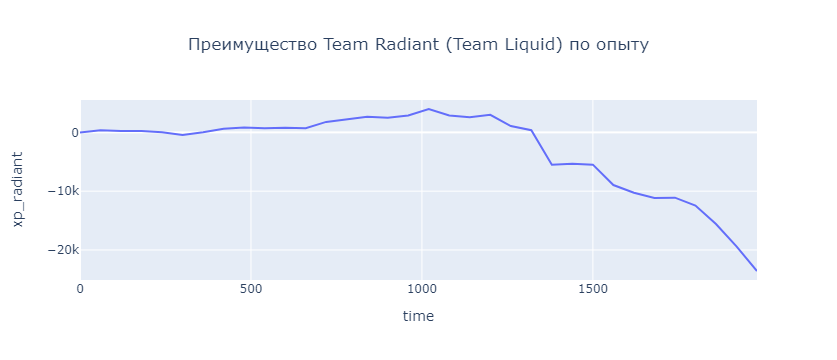

In [603]:
df = xp_radiant_df
fig = px.line(df, x='time', y="xp_radiant", title='Преимущество Team Radiant (Team Liquid) по опыту')
fig.update_layout(title_x=0.5)
fig.show()

<h4>Один график

In [604]:
time_range = [str(datetime.timedelta(seconds=time_)) for time_ in time]
# time_range

In [605]:
common_df = pd.DataFrame({'time': time_range[:-1], 'gold_radiant': gold_radiant[:-1], 'xp_radiant': xp_radiant[:-1]})
common_df.head()

,time,gold_radiant,xp_radiant
0,0:00:00,0.0,0.0
1,0:01:00,538.0,377.0
2,0:02:00,302.0,227.0
3,0:03:00,57.0,227.0
4,0:04:00,-399.0,39.0


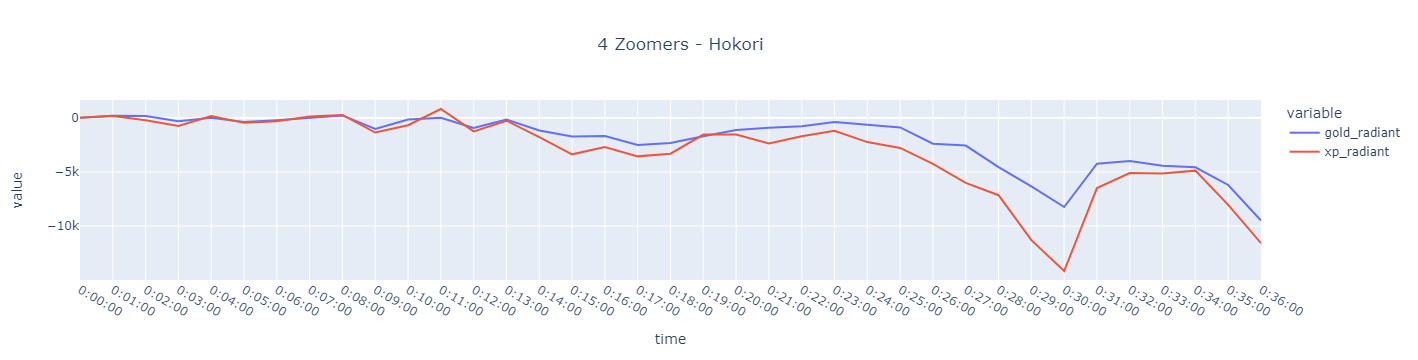

In [491]:
df = common_df
fig = px.line(df, x='time', y=df.columns[1:3], title='4 Zoomers - Hokori') 
fig.update_layout(title_x=0.48)
fig.show()

<h3>Heroes

In [506]:
certain_match_data.head(2)

,match_id,time,radiant_win,radiant_tower1,radiant_tower2,radiant_tower3,radiant_tower4,radiant_melee,radiant_range,radiant_fort,...,r1_hero_id,r2_hero_id,r3_hero_id,r4_hero_id,r5_hero_id,d1_hero_id,d2_hero_id,d3_hero_id,d4_hero_id,d5_hero_id
790,6023574998,0,0,3,3,3,2,3,3,1,...,87.0,61.0,21.0,86.0,12.0,88.0,55.0,72.0,83.0,10.0
791,6023574998,60,0,3,3,3,2,3,3,1,...,87.0,61.0,21.0,86.0,12.0,88.0,55.0,72.0,83.0,10.0


In [508]:
data_loc = certain_match_data.loc[[791], ['r1_hero_id', 'r2_hero_id', 'r3_hero_id', 'r4_hero_id', 'r5_hero_id', 'd1_hero_id', 'd2_hero_id', 'd3_hero_id', 'd4_hero_id', 'd5_hero_id']]
data_loc

,r1_hero_id,r2_hero_id,r3_hero_id,r4_hero_id,r5_hero_id,d1_hero_id,d2_hero_id,d3_hero_id,d4_hero_id,d5_hero_id
791,87.0,61.0,21.0,86.0,12.0,88.0,55.0,72.0,83.0,10.0


In [538]:
heroes_ids = []
for hero_data in data_loc.items():
    hero_id = hero_data[1].values[0]
    heroes_ids.append(hero_id)
    print(convert_hero_id_to_name(hero_id))

npc_dota_hero_disruptor
npc_dota_hero_broodmother
npc_dota_hero_windrunner
npc_dota_hero_rubick
npc_dota_hero_phantom_lancer
npc_dota_hero_nyx_assassin
npc_dota_hero_dark_seer
npc_dota_hero_gyrocopter
npc_dota_hero_treant
npc_dota_hero_morphling


In [541]:
heroes_ids

[87.0, 61.0, 21.0, 86.0, 12.0, 88.0, 55.0, 72.0, 83.0, 10.0]

In [549]:
radiant_team = {}
dire_team = {}
radiant_heroes = ['phantom_lancer', 'windrunner', 'broodmother', 'rubick', 'disruptor']
for prob, hero_data in her_winr.items():
    if hero_data['hero_id'] in heroes_ids:
        hero_name = convert_hero_id_to_name(hero_data['hero_id']).split('_')[3:]
        hero_name = '_'.join(hero_name)
        if hero_name in radiant_heroes:
            radiant_team.update({hero_name: prob})
        else:
            dire_team.update({hero_name: prob})

In [556]:
np.mean(list(radiant_team.values()))

0.5326651320577633

In [558]:
radiant_team

{'phantom_lancer': 0.5183946488294314,
 'windrunner': 0.5316901408450704,
 'broodmother': 0.5576208178438662,
 'rubick': 0.5356200527704486,
 'disruptor': 0.52}

In [557]:
np.mean(list(dire_team.values()))

0.4935412045754447

In [559]:
dire_team

{'morphling': 0.498567335243553,
 'treant': 0.5,
 'dark_seer': 0.4694835680751174,
 'gyrocopter': 0.49107142857142855,
 'nyx_assassin': 0.5085836909871244}

<h2>Рассмотрим статистику по крипам

In [340]:
radiant_lh = ['r' + str(i) + '_lh_t' for i in range(1, 6)]
dire_lh = ['d' + str(i) + '_lh_t' for i in range(1, 6)]

In [341]:
time_range = [str(datetime.timedelta(seconds=time_)) for time_ in time]
data_lh = certain_match_data[['time'] + radiant_lh + dire_lh]
data_lh.head()

,time,r1_lh_t,r2_lh_t,r3_lh_t,r4_lh_t,r5_lh_t,d1_lh_t,d2_lh_t,d3_lh_t,d4_lh_t,d5_lh_t
1144,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1145,60,3.0,0.0,1.0,0.0,3.0,3.0,2.0,2.0,0.0,2.0
1146,120,9.0,0.0,9.0,0.0,6.0,9.0,8.0,4.0,0.0,3.0
1147,180,14.0,0.0,11.0,2.0,12.0,16.0,11.0,11.0,1.0,4.0
1148,240,16.0,1.0,14.0,2.0,16.0,24.0,19.0,15.0,1.0,4.0


In [342]:
time = []
radiant_lh_t = []
dire_lh_t = []
for row in data_lh.iterrows():
    # row[1] - data
    time.append(row[1][0])
    radiant = row[1][1:6].values
    dire = row[1][6:11].values
    
    radiant_lh_t.append(sum(radiant))
    dire_lh_t.append(sum(dire))

In [343]:
time_range = [str(datetime.timedelta(seconds=time_)) for time_ in time]

In [344]:
common_df = pd.DataFrame({'time': time_range[:-1], 'radiant_lh': radiant_lh_t[:-1], 'dire_lh': dire_lh_t[:-1]})
common_df.head()

,time,radiant_lh,dire_lh
0,0:00:00,0.0,1.0
1,0:01:00,7.0,9.0
2,0:02:00,24.0,24.0
3,0:03:00,39.0,43.0
4,0:04:00,49.0,63.0


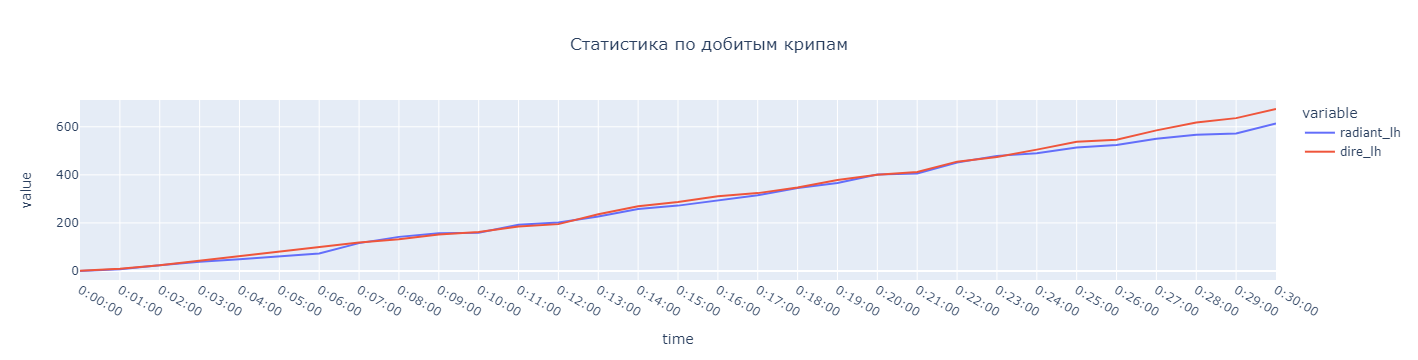

In [350]:
df = common_df[:31]
fig = px.line(df, x='time', y=df.columns[1:3], title='Статистика по добитым крипам')
fig.update_layout(title_x=0.5)
fig.show()

<h2>Соотношение побед/поражений для radiant

In [237]:
r_win = test_df['radiant_win'].where(test_df['radiant_win'] == 1).count() / len(test_df['radiant_win']) 
r_wins_count = test_df['radiant_win'].where(test_df['radiant_win'] == 1).count()
all_games = len(test_df['radiant_win'])
r_win

0.5157973921765295

In [238]:
r_wins_count, all_games - r_wins_count

(2057, 1931)

In [239]:
all_games

3988

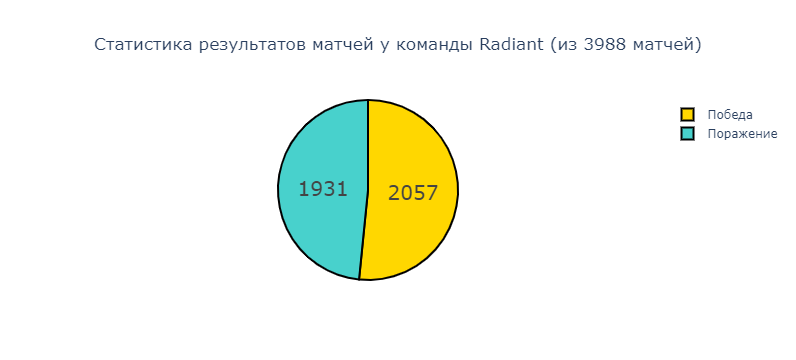

In [468]:
import plotly.express as px
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = px.pie(radiant_win_dff, values=[r_wins_count, all_games - r_wins_count], title='Статистика результатов матчей у команды Radiant (из 3988 матчей)',
            color_discrete_sequence=px.colors.sequential.RdBu, names=['Победа', 'Поражение'])
fig.update_layout(title_x=0.5)
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

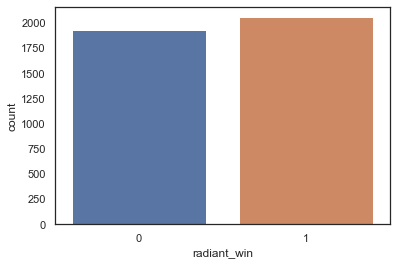

In [241]:
ax = sns.countplot(x="radiant_win", data=test_df)

<h2>TODO: Make Seaborn countplot

In [390]:
data_with_previous = pd.read_csv('../second_task/dota4k-matches-with-previous-data.csv', index_col=0)
data_with_previous.head()

,match_id,time,radiant_win,radiant_tower1,radiant_tower2,radiant_tower3,radiant_tower4,radiant_melee,radiant_range,radiant_fort,...,r1_mean_hero_damage,r2_mean_hero_damage,r3_mean_hero_damage,r4_mean_hero_damage,r5_mean_hero_damage,d1_mean_hero_damage,d2_mean_hero_damage,d3_mean_hero_damage,d4_mean_hero_damage,d5_mean_hero_damage
0,6022659410,0,0,3,3,3,2,3,3,1,...,24087.730159,9593.425532,13090.0,0.0,16544.0,24087.730159,9593.425532,13090.0,0.0,16544.0
1,6022659410,60,0,3,3,3,2,3,3,1,...,24087.730159,9593.425532,13090.0,0.0,16544.0,24087.730159,9593.425532,13090.0,0.0,16544.0
2,6022659410,120,0,3,3,3,2,3,3,1,...,24087.730159,9593.425532,13090.0,0.0,16544.0,24087.730159,9593.425532,13090.0,0.0,16544.0
3,6022659410,180,0,3,3,3,2,3,3,1,...,24087.730159,9593.425532,13090.0,0.0,16544.0,24087.730159,9593.425532,13090.0,0.0,16544.0
4,6022659410,240,0,3,3,3,2,3,3,1,...,24087.730159,9593.425532,13090.0,0.0,16544.0,24087.730159,9593.425532,13090.0,0.0,16544.0


In [363]:
data = pd.read_csv('../second_task/dota2-4k-matches-heroes-id.csv', index_col=0)

In [383]:
match = data[data['match_id'] == 6023949092]
match.tail()

,match_id,time,radiant_win,radiant_tower1,radiant_tower2,radiant_tower3,radiant_tower4,radiant_melee,radiant_range,radiant_fort,...,r1_hero_id,r2_hero_id,r3_hero_id,r4_hero_id,r5_hero_id,d1_hero_id,d2_hero_id,d3_hero_id,d4_hero_id,d5_hero_id
1178,6023949092,2040,0,0,0,3,2,3,3,1,...,94.0,83.0,129.0,79.0,17.0,70.0,74.0,120.0,64.0,58.0
1179,6023949092,2100,0,0,0,3,2,3,3,1,...,94.0,83.0,129.0,79.0,17.0,70.0,74.0,120.0,64.0,58.0
1180,6023949092,2160,0,0,0,3,2,3,3,1,...,94.0,83.0,129.0,79.0,17.0,70.0,74.0,120.0,64.0,58.0
1181,6023949092,2220,0,0,0,2,2,2,3,1,...,94.0,83.0,129.0,79.0,17.0,70.0,74.0,120.0,64.0,58.0
1182,6023949092,2280,0,0,0,2,0,2,2,0,...,94.0,83.0,129.0,79.0,17.0,70.0,74.0,120.0,64.0,58.0


In [402]:
data_loc = data.loc[[1181], ['r1_hero_id', 'r2_hero_id', 'r3_hero_id', 'r4_hero_id', 'r5_hero_id', 'd1_hero_id', 'd2_hero_id', 'd3_hero_id', 'd4_hero_id', 'd5_hero_id']]
data_loc

,r1_hero_id,r2_hero_id,r3_hero_id,r4_hero_id,r5_hero_id,d1_hero_id,d2_hero_id,d3_hero_id,d4_hero_id,d5_hero_id
1181,94.0,83.0,129.0,79.0,17.0,70.0,74.0,120.0,64.0,58.0


In [403]:
for hero_data in data_loc.items():
    hero_id = hero_data[1].values[0]
    print(convert_hero_id_to_name(hero_id))

npc_dota_hero_medusa
npc_dota_hero_treant
npc_dota_hero_mars
npc_dota_hero_shadow_demon
npc_dota_hero_storm_spirit
npc_dota_hero_ursa
npc_dota_hero_invoker
npc_dota_hero_pangolier
npc_dota_hero_jakiro
npc_dota_hero_enchantress


<h3>Медуза

In [391]:
data.loc[[1181], ['r1_lh_t']]

,r1_lh_t
1181,343.0


In [415]:
data_with_previous.loc[[1181], ['r2_mean_last_hits']]

,r2_mean_last_hits
1181,402.722222


<h3>Урса

In [409]:
data.loc[[1181], ['d1_lh_t']]

,d1_lh_t
1181,253.0


In [418]:
data_with_previous.loc[[1181], ['d3_mean_last_hits']]

,d3_mean_last_hits
1181,51.078431


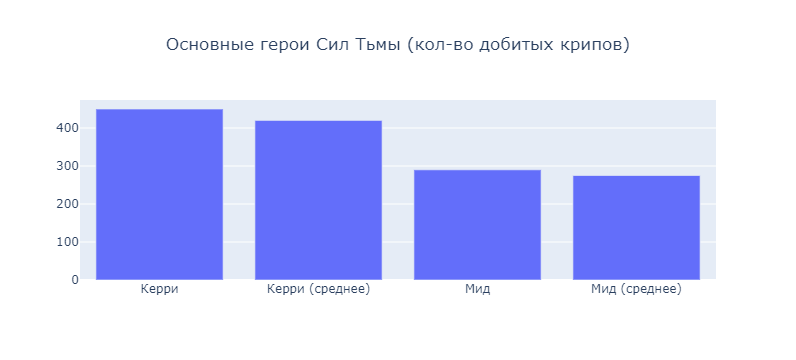

In [466]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(x=['Керри', 'Керри (среднее)', 'Мид', 'Мид (среднее)'], y=[450, 420, 290, 275])],
    layout_title_text="Основные герои Сил Тьмы (кол-во добитых крипов)"
)
fig.update_layout(title_x=0.5)
fig

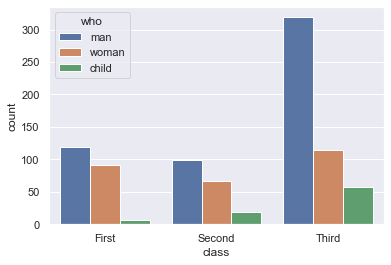

In [439]:
ax = sns.countplot(x="class", hue="who", data=titanic)